<a href="https://colab.research.google.com/github/MatheusrCunha/PDS_1/blob/main/Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
from scipy import signal, fftpack

In [17]:
from google.colab import files
uploaded = files.upload()

In [85]:
[fs_audio,audio]=wavfile.read('falhas_intermitentes.wav')
audio = audio.astype(np.float32)

In [86]:
T = 1/fs_audio
time_audio = np.linspace(0,10,audio.shape[0])
print('A frequência de amostragem é: {}Hz'.format(fs_audio))

A frequência de amostragem é: 44100Hz


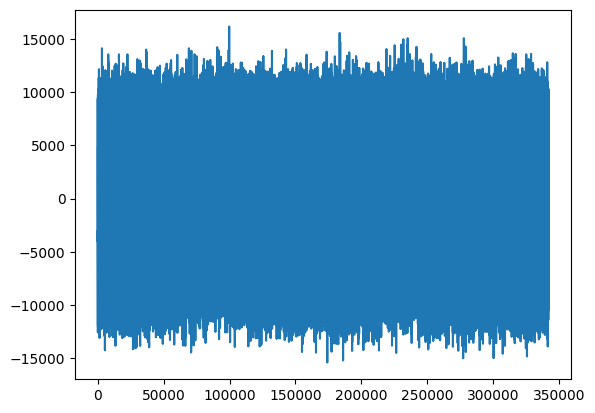

In [87]:
plt.plot(audio)

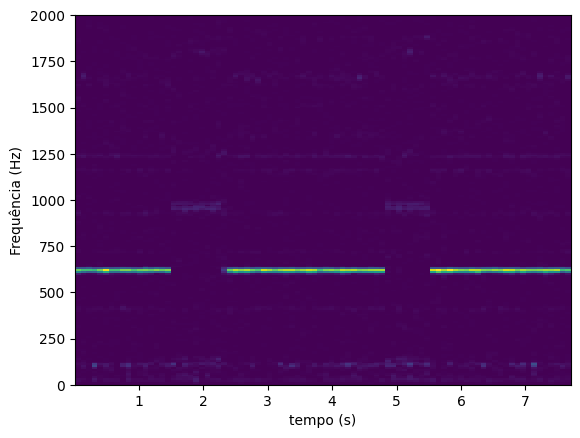

In [88]:
window = signal.windows.parzen(int(44100/10))
freq,tempo,potencia = signal.spectrogram(audio, fs_audio, window=window)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
plt.pcolormesh(tempo,freq,potencia)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.ylim([0, 2000])
plt.show()

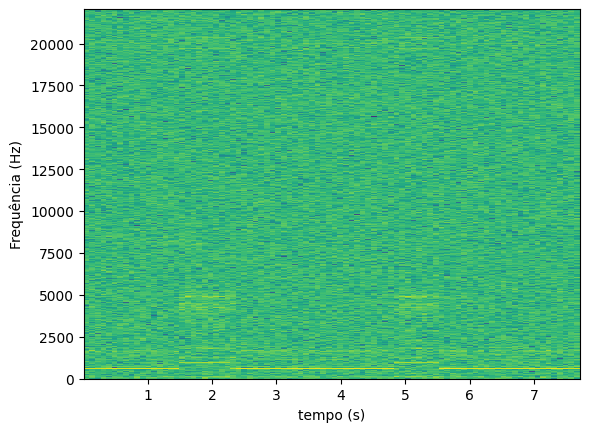

In [90]:
potencia_dB = 10*np.log10(potencia)
plt.pcolormesh(tempo,freq,potencia_dB)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.show()

In [ ]:
from IPython.display import Audio
Audio(audio, rate=fs_audio)

In [91]:
fm = np.mean(potencia_dB, axis=1)
freq_fm = np.argmax(fm)
freq_max = freq[freq_fm]
print(f'A maior magnitude é {freq_max} Hz.')

A maior magnitude é 620.0 Hz.


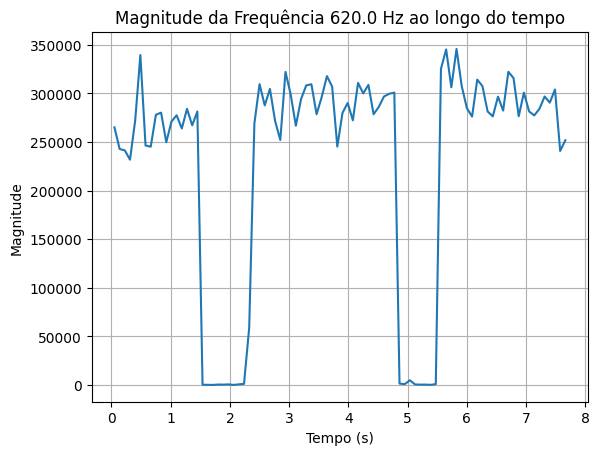

In [92]:
fi = np.argmax(freq_max)
plt.plot(tempo, potencia[freq_fm, :])
plt.title(f'Magnitude da Frequência {freq_max} Hz ao longo do tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

Text(0.5, 0, 'Frequency [radians / second]')

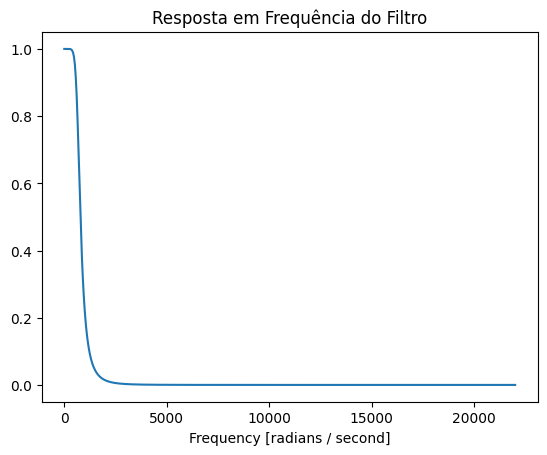

In [ ]:
fs_audio
b, a = signal.butter(4, 690, btype='low', fs=fs_audio)
w, h = signal.freqz(b, a, fs=fs_audio)
plt.plot(w, abs(h))
plt.title('Resposta em Frequência do Filtro')
plt.xlabel('Frequency [radians / second]')

Text(0.5, 0, 'Frequência (Hz)')

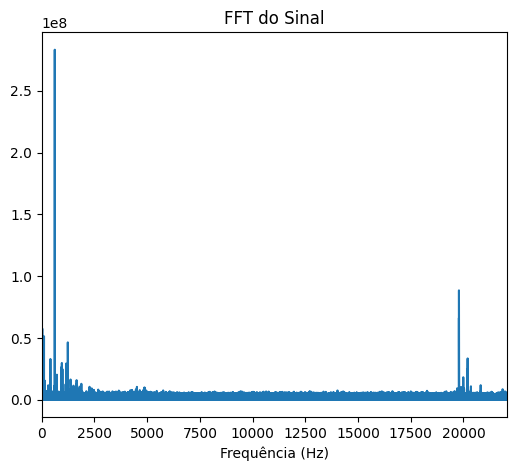

In [59]:
sinal_fft = np.fft.fft(audio)
sinal_fft = abs(sinal_fft)
freq_audio = np.arange(0,fs_audio,fs_audio/sinal_fft.shape[0])

plt.figure(figsize=(6,5))
plt.plot(freq_audio,sinal_fft)
plt.xlim(0,22050)
plt.title('FFT do Sinal')
plt.xlabel('Frequência (Hz)')

Text(0.5, 0, 'Sample')

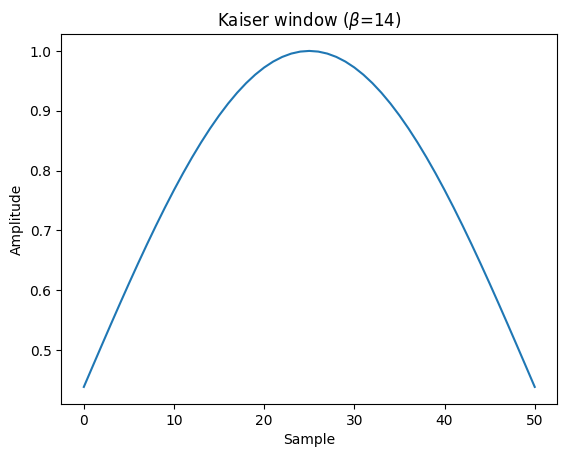

In [60]:
window = signal.windows.kaiser(51, beta=2)
plt.plot(window)
plt.title(r"Kaiser window ($\beta$=14)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")